In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [2]:
# Importing dataset
df=pd.read_csv("C:\\Users\\kalpana\\Downloads\\EastWestAirlines.csv")
# Column rename.
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [3]:
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
#only choose feature 

In [5]:
df.drop(labels=['ID'],axis=1,inplace=True)
df.drop(labels=['Award'],axis=1,inplace=True)

In [6]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [8]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

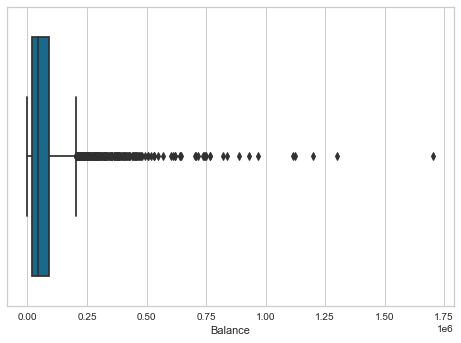

In [9]:
sns.boxplot(df.Balance)

In [10]:
Q1=df['Balance'].quantile(0.25)
Q3=df['Balance'].quantile(0.75)
IQR=Q3-Q1
Whisker_width=1.5
lower_wisker=Q1-(Whisker_width*IQR)
upper_wisker=Q3+(Whisker_width*IQR)
df['Balance']=np.where(df['Balance']>upper_wisker,upper_wisker,np.where(df['Balance']<lower_wisker,lower_wisker,df['Balance']))



C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

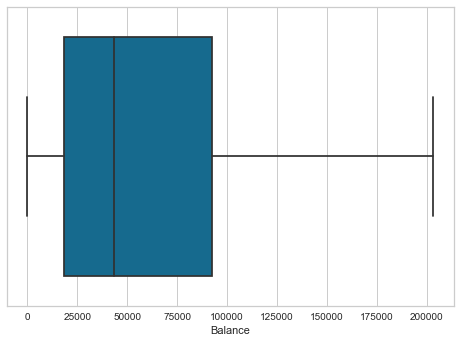

In [11]:
sns.boxplot(df['Balance'],data=df)

C:\Users\kalpana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Days_since_enroll'>

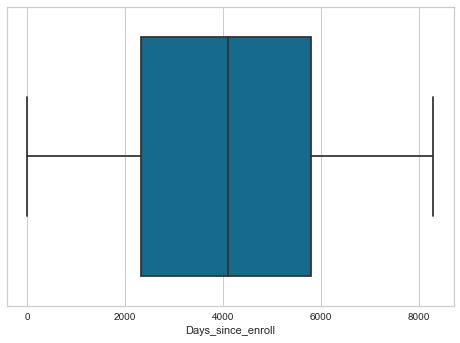

In [12]:
sns.boxplot(df. Days_since_enroll)

# Normalization

In [13]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.iloc[:,1:])

# K-MEAN

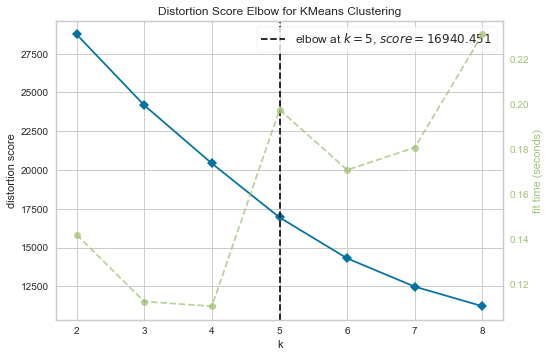

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(KMeans(),k=8)
visualizer.fit(df1)
visualizer.show()

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_df=pca.fit_transform(df1)
df2 = pd.DataFrame(data=pca_df, columns = ['components1','components2','components3','components4'])
df2

,components1,components2,components3,components4
0,-1.258966,-0.031563,-0.380836,-0.561625
1,-1.208310,-0.034889,-0.366905,-0.559455
2,-1.018654,-0.104396,-0.347546,-0.572995
3,-1.256634,-0.032107,-0.375741,-0.551152
4,2.800193,-0.271491,-0.214770,-0.650989
...,...,...,...,...
3994,-1.276654,0.520026,0.216601,0.593428
3995,-1.525081,0.392452,0.215187,0.560674
3996,-0.233867,-0.581143,0.154625,0.479295
3997,-1.519587,0.765417,0.176617,0.598860


In [16]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(df2)

KMeans(n_clusters=5, random_state=42)

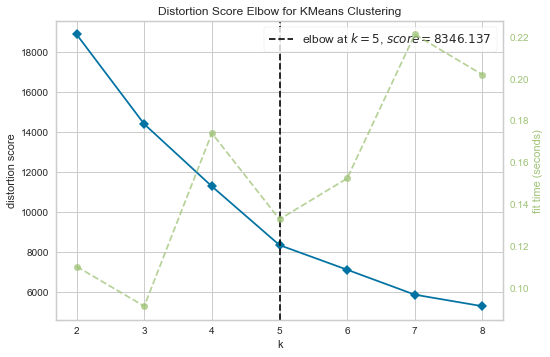

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(KMeans(),k=8)
visualizer.fit(df2)
visualizer.show()

In [18]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(df2)

KMeans(n_clusters=5, random_state=42)

In [19]:
clusters_new.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
#Assign clusters to the data set
df2['Kmeans'] = clusters_new.labels_

In [21]:
df2

,components1,components2,components3,components4,Kmeans
0,-1.258966,-0.031563,-0.380836,-0.561625,0
1,-1.208310,-0.034889,-0.366905,-0.559455,0
2,-1.018654,-0.104396,-0.347546,-0.572995,0
3,-1.256634,-0.032107,-0.375741,-0.551152,0
4,2.800193,-0.271491,-0.214770,-0.650989,2
...,...,...,...,...,...
3994,-1.276654,0.520026,0.216601,0.593428,0
3995,-1.525081,0.392452,0.215187,0.560674,0
3996,-0.233867,-0.581143,0.154625,0.479295,0
3997,-1.519587,0.765417,0.176617,0.598860,0


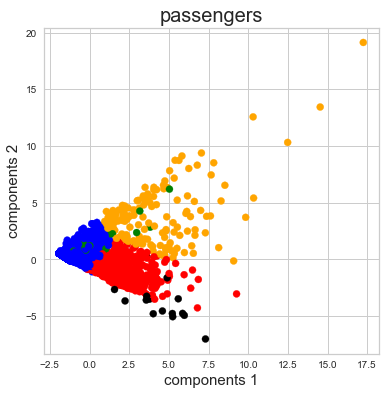

In [23]:
fig =plt.figure(figsize =(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('components 1',fontsize=15)
ax.set_ylabel('components 2',fontsize=15)
ax.set_title('passengers',fontsize=20)
color_theme =np.array(["blue","green","red","orange","black"])
ax.scatter(x=df2.components1,y=df2.components2,c=color_theme[df2.Kmeans],s=50)
plt.show()

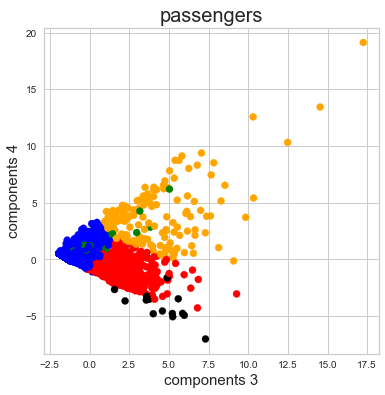

In [24]:
fig =plt.figure(figsize =(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('components 3',fontsize=15)
ax.set_ylabel('components 4',fontsize=15)
ax.set_title('passengers',fontsize=20)
color_theme =np.array(["blue","green","red","orange","black"])
ax.scatter(x=df2.components1,y=df2.components2,c=color_theme[df2.Kmeans],s=50)
plt.show()

In [25]:
#Assign clusters to the orignal data set
df['Kmeans'] = clusters_new.labels_

In [26]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Kmeans
0,28143.0,0,1,1,1,174,1,0,0,7000,0
1,19244.0,0,1,1,1,215,2,0,0,6968,0
2,41354.0,0,1,1,1,4123,4,0,0,7034,0
3,14776.0,0,1,1,1,500,1,0,0,6952,0
4,97752.0,0,4,1,1,43300,26,2077,4,6935,2


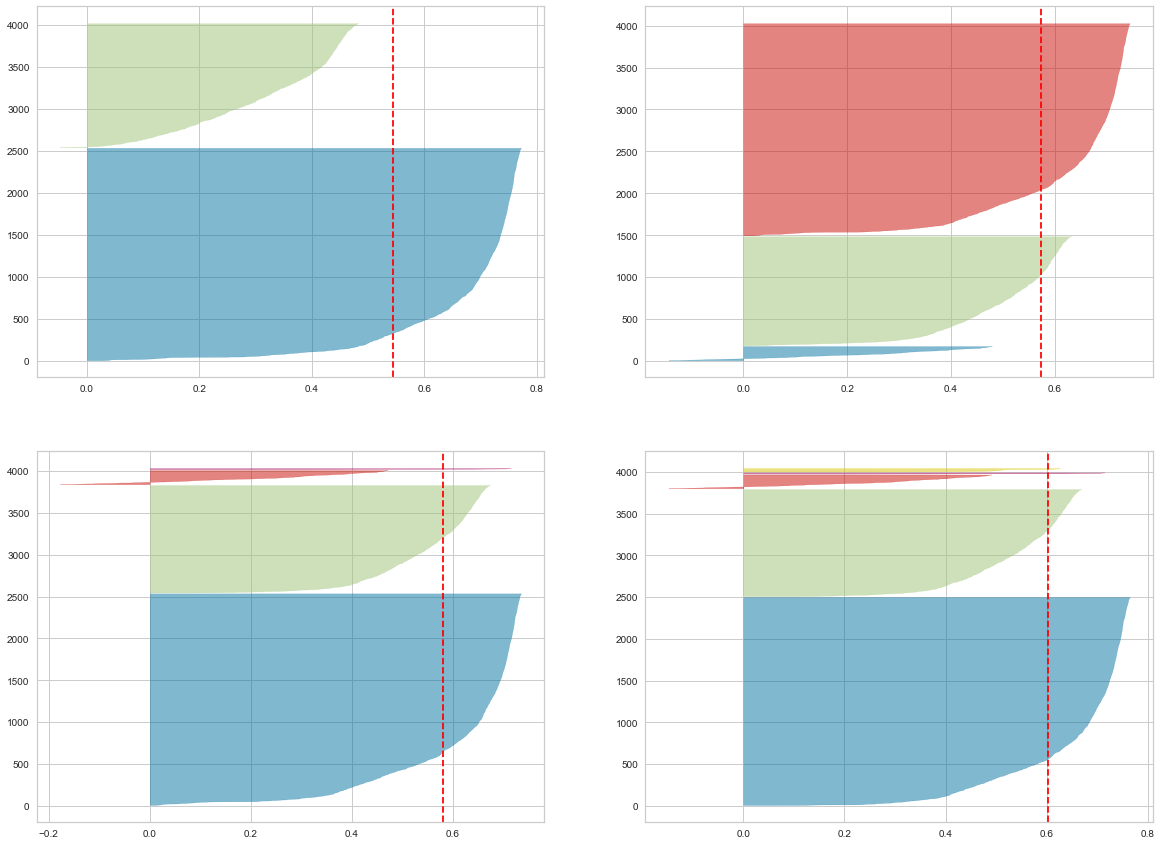

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(20,15))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df2) 

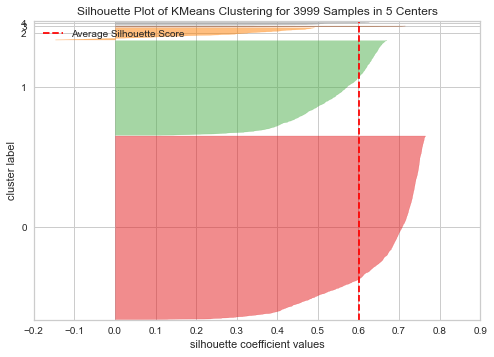

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3999 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
model_5clust = KMeans(n_clusters = 5, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_5clust)
sil_visualizer.fit(df2)    
sil_visualizer.show()

In [29]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=5, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(df2)
    sil_score1= silhouette_score(df2, cluster_labels1)
    print("For n_clusters =", 5,"The average silhouette_score is :", sil_score1)

For n_clusters = 5 The average silhouette_score is : 0.6014934438565472
For n_clusters = 5 The average silhouette_score is : 0.6014934438565472
For n_clusters = 5 The average silhouette_score is : 0.6014934438565472
For n_clusters = 5 The average silhouette_score is : 0.6014934438565472
For n_clusters = 5 The average silhouette_score is : 0.6014934438565472
For n_clusters = 5 The average silhouette_score is : 0.6014934438565472
For n_clusters = 5 The average silhouette_score is : 0.6014934438565472
For n_clusters = 5 The average silhouette_score is : 0.6014934438565472


#  Run Hierarchical Clustering.(Agglomerative Clustering)


In [30]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(df2)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [31]:
# Cluster numbers

agg_clustering.n_clusters_

5

In [32]:
# Clustering Score

(silhouette_score(df2, agg_clustering.labels_)*100).round(3)

69.7

In [33]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(df2)
        silhouette_score1 = silhouette_score(df2, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.544174660184965
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8475725248686701
For n_clusters = 2 The average silhouette_score with linkage- average : 0.883602511952465
For n_clusters = 2 The average silhouette_score with linkage- single : 0.883602511952465

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5718112335422991
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.8138793179771604
For n_clusters = 3 The average silhouette_score with linkage- average : 0.8150849496367257
For n_clusters = 3 The average silhouette_score with linkage- single : 0.776161477475247

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.5777387454315727
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.7004611170283191
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7590030085648639
For n_clu

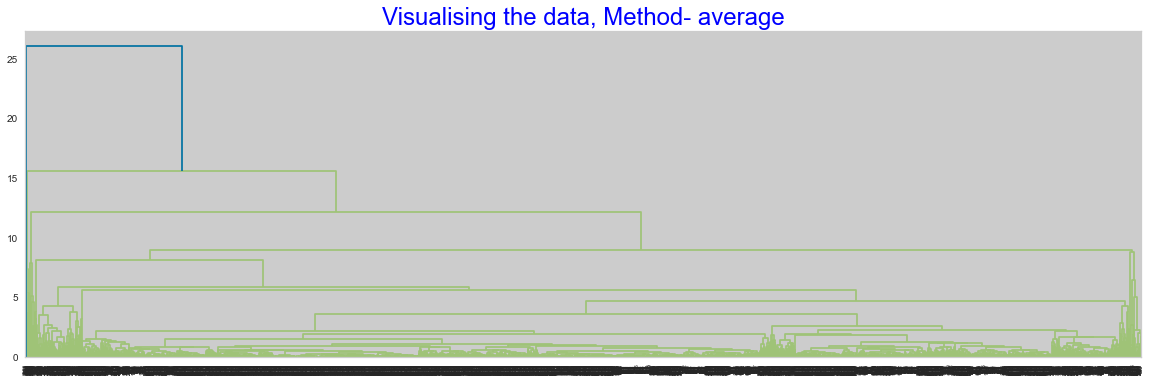

In [34]:
import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(df2, method = methods,optimal_ordering=False))

# Putting Cluster lables into original dataset And analysis of the same.

In [35]:
hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [36]:
 
df3 = pd.concat([df.copy(),hie_cluster], axis=1)
df3 .head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Kmeans,Hie_Clustering
0,28143.0,0,1,1,1,174,1,0,0,7000,0,1
1,19244.0,0,1,1,1,215,2,0,0,6968,0,1
2,41354.0,0,1,1,1,4123,4,0,0,7034,0,1
3,14776.0,0,1,1,1,500,1,0,0,6952,0,1
4,97752.0,0,4,1,1,43300,26,2077,4,6935,2,1


In [37]:
df.Kmeans.unique()

array([0, 2, 1, 3, 4])

In [38]:
df3.Hie_Clustering.unique()

array([1, 0, 2, 4, 3], dtype=int64)

# df['Kmeans'].value_counts().plot.bar()

<AxesSubplot:>

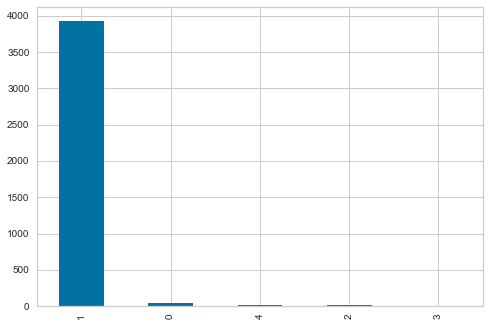

In [40]:
df3['Hie_Clustering'].value_counts().plot.bar()